# Определение перспективного тарифа для телеком компании

 «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

## Шаг 1. Открытие файлов с данными и объединение их. 

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import datetime
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

In [2]:
data_calls = pd.read_csv(url)
data_internet = pd.read_csv(url, index_col=0)
data_messages = pd.read_csv(url)
data_tariffs = pd.read_csv(url)
data_users = pd.read_csv(url)

In [3]:
data_calls.head(), data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


(       id   call_date  duration  user_id
 0  1000_0  2018-07-25      0.00     1000
 1  1000_1  2018-08-17      0.00     1000
 2  1000_2  2018-06-11      2.85     1000
 3  1000_3  2018-09-21     13.80     1000
 4  1000_4  2018-12-15      5.18     1000,
 None)

In [4]:
data_calls.call_date.min(),data_calls.call_date.max()

('2018-01-01', '2018-12-31')

In [5]:
data_internet.head(), data_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


(       id  mb_used session_date  user_id
 0  1000_0   112.95   2018-11-25     1000
 1  1000_1  1052.81   2018-09-07     1000
 2  1000_2  1197.26   2018-06-25     1000
 3  1000_3   550.27   2018-08-22     1000
 4  1000_4   302.56   2018-09-24     1000,
 None)

In [6]:
data_internet.session_date.min(),data_internet.session_date.max()

('2018-01-01', '2018-12-31')

In [7]:
data_messages.head(), data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


(       id message_date  user_id
 0  1000_0   2018-06-27     1000
 1  1000_1   2018-10-08     1000
 2  1000_2   2018-08-04     1000
 3  1000_3   2018-06-16     1000
 4  1000_4   2018-12-05     1000,
 None)

In [8]:
data_messages.message_date.min(),data_messages.message_date.max()

('2018-01-02', '2018-12-31')

In [9]:
data_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [10]:
data_users.head(), data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


(   user_id  age churn_date         city first_name  last_name    reg_date  \
 0     1000   52        NaN    Краснодар     Рафаил  Верещагин  2018-05-25   
 1     1001   41        NaN       Москва       Иван       Ежов  2018-11-01   
 2     1002   59        NaN  Стерлитамак    Евгений  Абрамович  2018-06-17   
 3     1003   23        NaN       Москва      Белла   Белякова  2018-08-17   
 4     1004   68        NaN  Новокузнецк    Татьяна   Авдеенко  2018-05-14   
 
   tariff  
 0  ultra  
 1  smart  
 2  smart  
 3  ultra  
 4  ultra  ,
 None)

Создадим датафрем с первым число месяца, для объядинения всех таблиц по этим значениям

In [11]:
month =  pd.DataFrame({'month':pd.date_range(start='2018-01-01', end='2018-12-01',freq='MS')})
month

,month
0,2018-01-01
1,2018-02-01
2,2018-03-01
3,2018-04-01
4,2018-05-01
5,2018-06-01
6,2018-07-01
7,2018-08-01
8,2018-09-01
9,2018-10-01


In [12]:
data_users['key'] = 1
month['key'] = 1

In [13]:
template = data_users.merge(month, on='key')

In [14]:
template['reg_month'] = template['reg_date'].to_numpy().astype('datetime64[M]')

In [15]:
template

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,key,month,reg_month
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,2018-01-01,2018-05-01
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,2018-02-01,2018-05-01
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,2018-03-01,2018-05-01
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,2018-04-01,2018-05-01
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,2018-05-01,2018-05-01
...,...,...,...,...,...,...,...,...,...,...,...
5995,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,1,2018-08-01,2018-09-01
5996,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,1,2018-09-01,2018-09-01
5997,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,1,2018-10-01,2018-09-01
5998,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,1,2018-11-01,2018-09-01


Отфильтруем всех, нам нужны строчки где дата регистрации меньше месяца

In [16]:
template = template[template['month'] >= template['reg_month']]

In [17]:
template[template['user_id'] == 1498]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,key,month,reg_month
5982,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,1,2018-07-01,2018-07-01
5983,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,1,2018-08-01,2018-07-01
5984,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,1,2018-09-01,2018-07-01
5985,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,1,2018-10-01,2018-07-01
5986,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,1,2018-11-01,2018-07-01
5987,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,1,2018-12-01,2018-07-01


Заменим пропуски в `churn_date` на первый день последнего месяца в выборке

In [18]:
template['churn_date'] = np.where(template['churn_date'].isna(), '2018-12-01',template['churn_date'])

Ещё раз отфильтруем всех, теперь нам нужны строчки где дата прекращения пользования тарифом больше месяца

In [19]:
template = template[template['month'] <= template['churn_date']]
template

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,key,month,reg_month
4,1000,52,2018-12-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,2018-05-01,2018-05-01
5,1000,52,2018-12-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,2018-06-01,2018-05-01
6,1000,52,2018-12-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,2018-07-01,2018-05-01
7,1000,52,2018-12-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,2018-08-01,2018-05-01
8,1000,52,2018-12-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,2018-09-01,2018-05-01
...,...,...,...,...,...,...,...,...,...,...,...
5985,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,1,2018-10-01,2018-07-01
5996,1499,35,2018-12-01,Пермь,Гектор,Корнилов,2018-09-27,smart,1,2018-09-01,2018-09-01
5997,1499,35,2018-12-01,Пермь,Гектор,Корнилов,2018-09-27,smart,1,2018-10-01,2018-09-01
5998,1499,35,2018-12-01,Пермь,Гектор,Корнилов,2018-09-27,smart,1,2018-11-01,2018-09-01


In [20]:
template[template['user_id'] == 1498]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,key,month,reg_month
5982,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,1,2018-07-01,2018-07-01
5983,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,1,2018-08-01,2018-07-01
5984,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,1,2018-09-01,2018-07-01
5985,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,1,2018-10-01,2018-07-01


- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tarif — название тарифного плана
- call_date — дата звонка
- duration — длительность звонка в минутах
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со - 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

### Вывод

- Есть пропуски в столбце `churn_date`, заменили на первый день последнего месяца в выборке.
- Нужно поменять тип данных на дату в столбцах `churn_date`, `reg_date`, `message_date`, `session_date` и `call_date`.

## Шаг 2. Подготовьте данные

### Приведите данные к нужным типам

In [21]:
data_calls['call_date'] = data_calls['call_date'].apply(pd.to_datetime)

In [22]:
data_messages['message_date'] = data_messages['message_date'].apply(pd.to_datetime)

In [23]:
data_internet['session_date'] = data_internet['session_date'].apply(pd.to_datetime)

In [24]:
template[['churn_date', 'reg_date']] = template[['churn_date', 'reg_date']].apply(pd.to_datetime)

In [25]:
data_calls.info(),data_messages.info(),data_internet.info(),template.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data colu

(None, None, None, None)

### Найдите и исправьте ошибки в данных, если они есть.

Так как даже если звонок длился всего 1 секунду, будет засчитан как 1 минута, округлим длительность звонков в большую сторону.

In [26]:
data_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [27]:
data_calls['duration'] = np.ceil(data_calls['duration'])
data_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000


Добавим колонку с номером месяца для сообщений, звонков и интеренета.

In [28]:
data_calls['month'] = data_calls['call_date'].astype('datetime64[M]')
data_messages['month'] = data_messages['message_date'].astype('datetime64[M]')
data_internet['month'] = data_internet['session_date'].astype('datetime64[M]')

In [29]:
data_calls.head(1)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,2018-07-01


In [30]:
data_messages.head(1)

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,2018-06-01


In [31]:
data_internet.head(1)

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,2018-11-01


### Посчитайте для каждого пользователя:

#### количество сделанных звонков и израсходованных минут разговора по месяцам;

In [32]:
calls_month = data_calls.groupby(['user_id', 'month']).agg({'call_date':'count', 'duration': 'sum'}).reset_index()
calls_month = calls_month.rename(columns={"call_date": "count_calls", "duration": "duration_sum"})
calls_month.head()

,user_id,month,count_calls,duration_sum
0,1000,2018-05-01,22,159.0
1,1000,2018-06-01,43,172.0
2,1000,2018-07-01,47,340.0
3,1000,2018-08-01,52,408.0
4,1000,2018-09-01,58,466.0


#### количество отправленных сообщений по месяцам;

In [33]:
messages_month = data_messages.groupby(['user_id', 'month']).agg({'message_date':'count'}).reset_index()
messages_month = messages_month.rename(columns={"message_date": "count_messages"})
messages_month.head()

,user_id,month,count_messages
0,1000,2018-05-01,22
1,1000,2018-06-01,60
2,1000,2018-07-01,75
3,1000,2018-08-01,81
4,1000,2018-09-01,57


#### объем израсходованного интернет-трафика по месяцам;

In [34]:
internet_month = data_internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'}).reset_index()
internet_month = internet_month.rename(columns={"mb_used": "mb_used_sum"})
internet_month.head()

,user_id,month,mb_used_sum
0,1000,2018-05-01,2253.49
1,1000,2018-06-01,23233.77
2,1000,2018-07-01,14003.64
3,1000,2018-08-01,14055.93
4,1000,2018-09-01,14568.91


Так как если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта, добавим столбец с использоваными гигибайтами и округлим его в большую сторону.

In [35]:
internet_month['gb_used'] = internet_month.mb_used_sum / 1024
internet_month['gb_used'] = internet_month['gb_used'].apply(np.ceil)
internet_month.head()

,user_id,month,mb_used_sum,gb_used
0,1000,2018-05-01,2253.49,3.0
1,1000,2018-06-01,23233.77,23.0
2,1000,2018-07-01,14003.64,14.0
3,1000,2018-08-01,14055.93,14.0
4,1000,2018-09-01,14568.91,15.0


#### помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

Объединим все таблицы

In [36]:
data_full_month = template.merge(calls_month, how='left', on=['month','user_id']).merge(messages_month, how='left', on=['month','user_id']).merge(internet_month, how='left', on=['month','user_id']) \
                          .merge(data_tariffs, how='left', left_on='tariff',right_on='tariff_name')
data_full_month

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,key,month,...,mb_used_sum,gb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,52,2018-12-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,2018-05-01,...,2253.49,3.0,1000,30720,3000,1950,150,1,1,ultra
1,1000,52,2018-12-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,2018-06-01,...,23233.77,23.0,1000,30720,3000,1950,150,1,1,ultra
2,1000,52,2018-12-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,2018-07-01,...,14003.64,14.0,1000,30720,3000,1950,150,1,1,ultra
3,1000,52,2018-12-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,2018-08-01,...,14055.93,14.0,1000,30720,3000,1950,150,1,1,ultra
4,1000,52,2018-12-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,2018-09-01,...,14568.91,15.0,1000,30720,3000,1950,150,1,1,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,1,2018-10-01,...,20579.36,21.0,50,15360,500,550,200,3,3,smart
3212,1499,35,2018-12-01,Пермь,Гектор,Корнилов,2018-09-27,smart,1,2018-09-01,...,1845.75,2.0,50,15360,500,550,200,3,3,smart
3213,1499,35,2018-12-01,Пермь,Гектор,Корнилов,2018-09-27,smart,1,2018-10-01,...,17788.51,18.0,50,15360,500,550,200,3,3,smart
3214,1499,35,2018-12-01,Пермь,Гектор,Корнилов,2018-09-27,smart,1,2018-11-01,...,17963.31,18.0,50,15360,500,550,200,3,3,smart


напишем функцию по подсчету выручки

In [37]:
def proceeds_sum(df):
    summ = 0
    if df['gb_used'] * 1024 > df['mb_per_month_included']:
        summ += (df['gb_used'] - df['mb_per_month_included'] / 1024) * df['rub_per_gb']
    if df['count_messages'] > df['messages_included']:
        summ += (df['count_messages'] - df['messages_included']) * df['rub_per_message']
    if df['duration_sum'] > df['minutes_included']:
        summ += (df['duration_sum'] - df['minutes_included']) * df['rub_per_minute']
    return summ + df['rub_monthly_fee']

In [38]:
data_full_month['proceeds'] = data_full_month.apply(proceeds_sum, axis=1)

In [39]:
data_full_month

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,key,month,...,gb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,proceeds
0,1000,52,2018-12-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,2018-05-01,...,3.0,1000,30720,3000,1950,150,1,1,ultra,1950.0
1,1000,52,2018-12-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,2018-06-01,...,23.0,1000,30720,3000,1950,150,1,1,ultra,1950.0
2,1000,52,2018-12-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,2018-07-01,...,14.0,1000,30720,3000,1950,150,1,1,ultra,1950.0
3,1000,52,2018-12-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,2018-08-01,...,14.0,1000,30720,3000,1950,150,1,1,ultra,1950.0
4,1000,52,2018-12-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,2018-09-01,...,15.0,1000,30720,3000,1950,150,1,1,ultra,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,1,2018-10-01,...,21.0,50,15360,500,550,200,3,3,smart,1750.0
3212,1499,35,2018-12-01,Пермь,Гектор,Корнилов,2018-09-27,smart,1,2018-09-01,...,2.0,50,15360,500,550,200,3,3,smart,550.0
3213,1499,35,2018-12-01,Пермь,Гектор,Корнилов,2018-09-27,smart,1,2018-10-01,...,18.0,50,15360,500,550,200,3,3,smart,1150.0
3214,1499,35,2018-12-01,Пермь,Гектор,Корнилов,2018-09-27,smart,1,2018-11-01,...,18.0,50,15360,500,550,200,3,3,smart,1513.0


## Шаг 3. Проанализируйте данные

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

In [40]:
data_full_month['tariff'] = np.where(data_full_month['rub_monthly_fee'] == 550, 'smart', 'ultra')

In [41]:
tariff_month = data_full_month.groupby(['tariff', 'month'], as_index=False) \
                              .agg({'duration_sum':'sum', 'count_messages':'sum', 'gb_used':'sum'})

In [42]:
tariff_month

,tariff,month,duration_sum,count_messages,gb_used
0,smart,2018-01-01,6931.0,620.0,297.0
1,smart,2018-02-01,17324.0,1397.0,687.0
2,smart,2018-03-01,30034.0,2453.0,1173.0
3,smart,2018-04-01,41119.0,3443.0,1526.0
4,smart,2018-05-01,54618.0,4762.0,2243.0
5,smart,2018-06-01,64885.0,5478.0,2616.0
6,smart,2018-07-01,82079.0,6784.0,3191.0
7,smart,2018-08-01,99045.0,7905.0,3933.0
8,smart,2018-09-01,111439.0,8746.0,4262.0
9,smart,2018-10-01,125284.0,9927.0,4963.0


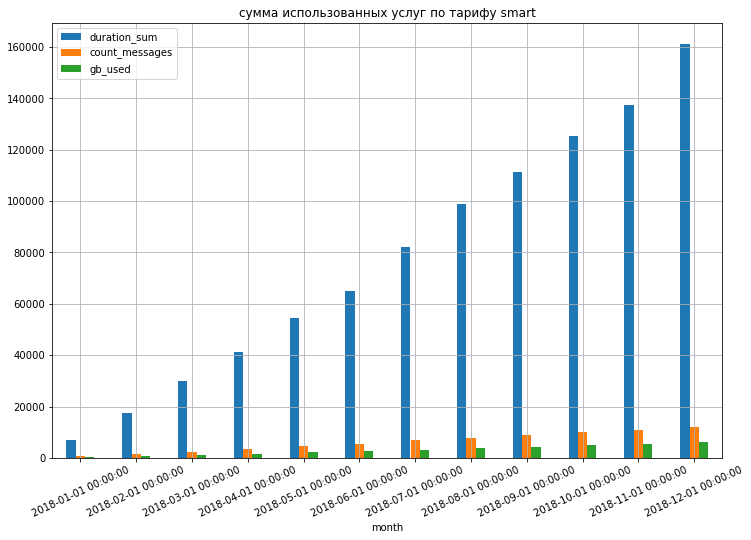

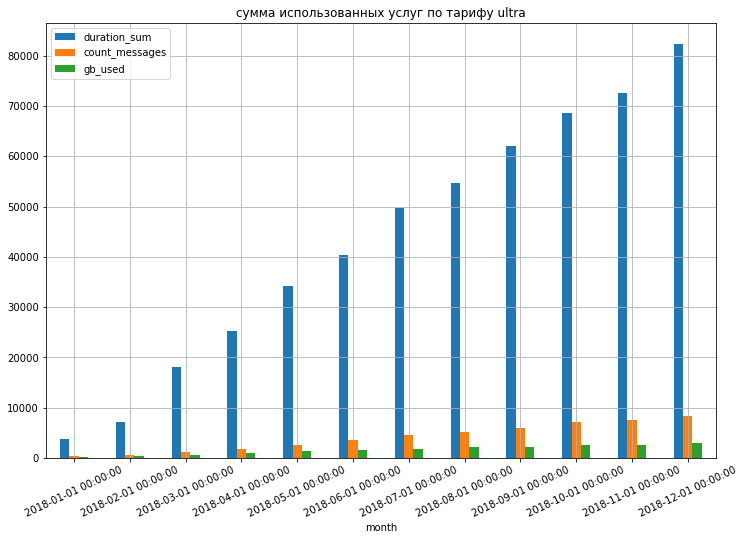

In [43]:
for tariff in ["smart", "ultra"]:
    smart_month = tariff_month.query('tariff == @tariff')
    smart_month.index = smart_month['month']
    smart_month = smart_month.drop('month', axis=1)
    smart_month.plot(kind='bar', grid=True, figsize=(12,8))
    plt.xticks(rotation=25)
    plt.title('сумма использованных услуг по тарифу ' + tariff)

 На двух тарифах с каждым месяцом количество минут разговора, количество сообщений и объём интернет-трафика используемый пользователями растет.

In [44]:
tariff_month.groupby('tariff').agg({'duration_sum':['mean', np.var, np.std], 
                                    'count_messages':['mean', np.var, np.std], 
                                    'gb_used':['mean', np.var, np.std],})

duration_sum                             count_messages                \
                mean           var           std           mean           var   
tariff                                                                          
smart   77631.416667  2.491282e+09  49912.744923    6201.083333  1.437160e+07   
ultra   43227.000000  6.786517e+08  26050.944558    4051.916667  8.057361e+06   

                         gb_used                             
                std         mean           var          std  
tariff                                                       
smart   3790.989687  3033.083333  3.697771e+06  1922.958821  
ultra   2838.549036  1600.166667  9.025132e+05   950.006970

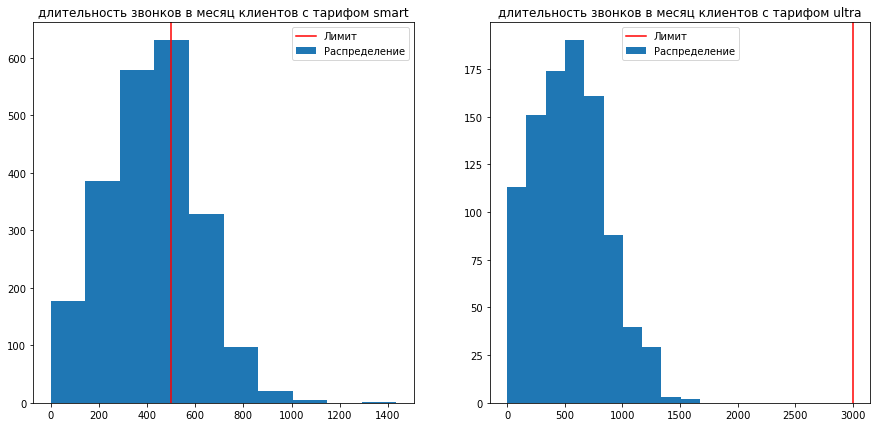

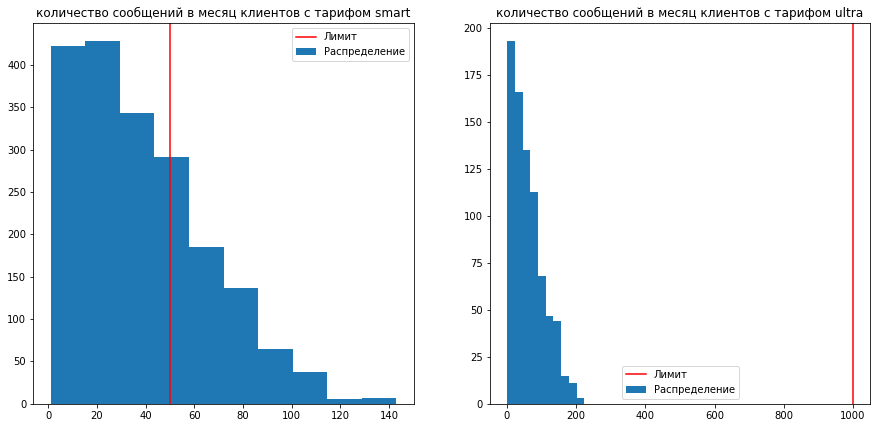

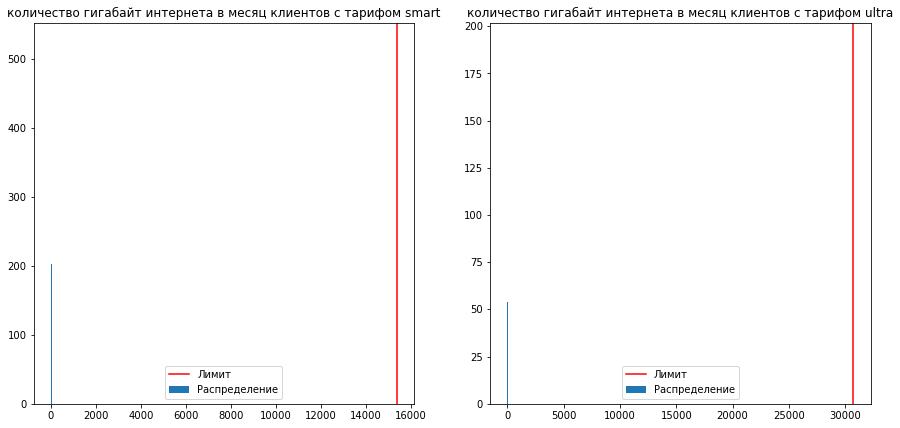

In [45]:
columns = {'duration_sum': ('длительность звонков в месяц клиентов','minutes_included'),
           'count_messages': ('количество сообщений в месяц клиентов', 'messages_included'), 
           'gb_used': ('количество гигабайт интернета в месяц клиентов','mb_per_month_included')}

for column, (title,limit) in columns.items():
    fig, ax = plt.subplots(1, 2, figsize=(15, 7))
    ax[0].hist(data_full_month.query('tariff == "smart"')[column])
    ax[0].axvline(data_tariffs[data_tariffs['tariff_name'] == 'smart'][limit].squeeze(), color='red')
    ax[0].set_title(title + ' с тарифом smart')
    ax[0].legend(['Лимит','Распределение'])
    ax[1].hist(data_full_month.query('tariff == "ultra"')[column])
    ax[1].axvline(data_tariffs[data_tariffs['tariff_name'] == 'ultra'][limit].squeeze(), color='red')
    ax[1].set_title(title + ' с тарифом ultra')
    ax[1].legend(['Лимит','Распределение'])

Значения длительности звонков и количества гигабайт в двух тарифах распределены нормально, а количество сообщений скошены вправо.

In [46]:
data_full_month.query('tariff == "ultra"')['proceeds'].mean()

2070.030425963489

In [47]:
data_full_month.query('tariff == "smart"')['proceeds'].mean()

1289.6417040358745

In [48]:
data_full_month.query('tariff == "ultra"')['proceeds'].mean() - data_full_month.query('tariff == "smart"')['proceeds'].mean()

780.3887219276146

В среднем на клиента тариф ultra приносит на 780 рублей больше чем тариф smart.

### Вывод

- На двух тарифах с каждым месяцом количество минут разговора, количество сообщений и объём интернет-трафика используемый пользователями растет.
- Значения длительности звонков и количества гигабайт в двух тарифах распределены нормально, а количество сообщений скошены вправо.

## Шаг 4. Проверьте гипотезы

### средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;

In [49]:
tariff_smart = data_full_month.query('tariff == "smart"')['proceeds']
tariff_ultra = data_full_month.query('tariff == "ultra"')['proceeds']
alpha = .05

In [50]:
results = st.ttest_ind(tariff_smart, tariff_ultra)

In [51]:
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 8.081909555489933e-161
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу о том, что выручка пользователей в месяц тарифов «Ультра» и «Смарт» равна, значит она различается.

### средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов.

In [52]:
data_full_month = data_full_month.merge(data_users[['user_id','city']])

In [53]:
city_mosk = data_full_month.query('city == "Москва"')['proceeds']
city_others = data_full_month.query('city != "Москва"')['proceeds']

In [54]:
results = st.ttest_ind(city_mosk, city_others)

In [55]:
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5400751614511182
Не получилось отвергнуть нулевую гипотезу


Не отвергаем нулевую гипотизу о том, что выручка пользователей из Москвы равна выручке пользователей из других регионов.

### Вывод

- Выручка пользователей тарифов «Ультра» и «Смарт» различается.
- Выручка пользователей из Москвы равна выручке пользователей из других регионов.

## Общий вывод

- На двух тарифах с каждым месяцом количество минут разговора, количество сообщений и объём интернет-трафика используемый пользователями растет.
- Значения длительности звонков и количества гигабайт в двух тарифах распределены нормально, а количество сообщений скошены вправо.
- Выручка пользователей тарифов «Ультра» и «Смарт» различается.
- Выручка пользователей из Москвы равна выручке пользователей из других регионов.
- Тариф ultra лучше, потому что в среднем клиенты с тарифом ultra приносят на 780 рублей больше выручке чем клиенты с тарифом smart.